In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn import cross_validation
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

/Users/poojachoudhary/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [339]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [1]:
import lightgbm as lgb

In [287]:
titanic_train = pd.read_csv("titanic_train.csv")
titanic_test = pd.read_csv("titanic_test.csv")
titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [288]:
titanic_train.shape

(891, 12)

In [289]:
titanic_test.shape

(418, 11)

In [290]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#Age has 177 missing values. replacing by group mean

In [291]:
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [292]:
titanic_train['Age'] = titanic_train.groupby(['Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
titanic_test['Age'] = titanic_test.groupby(['Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

In [293]:
titanic_test['Fare'].fillna(titanic_test["Fare"].median(),inplace = True)

In [294]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [295]:
titanic_train['Embarked'].fillna(titanic_train["Embarked"].value_counts().index[0],inplace = True)

As only 2 rows have missing values. I replaced them using mode

In [296]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#More than 75% of the values in Cabin Column is missing. So, I removed the column from the consideration

 # Percentage of Passengers Died/Survived

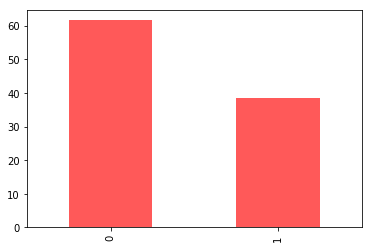

In [297]:
(titanic_train["Survived"].value_counts(normalize=True)*100).plot(kind='bar', color="red", alpha=.65)

61.6% people died during the titantic sink

# Counting number of Passengers Died/Survived by Sex

In [298]:
titanic_train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [299]:
titanic_train[titanic_train["Survived"]==1]["Sex"].value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [300]:
survived = titanic_train[titanic_train["Survived"] == 1]["Sex"].value_counts()
dead = titanic_train[titanic_train["Survived"] == 0]["Sex"].value_counts()
percent_female_survived = survived["female"]/titanic_train["Sex"].value_counts()["female"]*100
percent_male_survived = survived["male"]/titanic_train["Sex"].value_counts()["male"]*100
print("Percentage female survived =",percent_female_survived,"%")
print("Percentage male survived =",percent_male_survived,"%")

Percentage female survived = 74.2038216561 %
Percentage male survived = 18.8908145581 %


In [301]:
# Counting number of Passengers Died/Survived by Embarkment

In [302]:
survived_e = titanic_train[titanic_train["Survived"] == 1]["Embarked"].value_counts()
percent_survived_S = survived_e[0]/titanic_train["Embarked"].value_counts()[0]*100
percent_survived_C = survived_e[1]/titanic_train["Embarked"].value_counts()[1]*100
percent_survived_Q = survived_e[2]/titanic_train["Embarked"].value_counts()[2]*100
print("Percentage survived in Embarked S =",percent_survived_S,"%")
print("Percentage survived in Embarked C =",percent_survived_C,"%")
print("Percentage survived in Embarked Q =",percent_survived_Q,"%")

Percentage survived in Embarked S = 33.9009287926 %
Percentage survived in Embarked C = 55.3571428571 %
Percentage survived in Embarked Q = 38.961038961 %


In [303]:
survived_class = titanic_train[titanic_train["Survived"] == 1]["Pclass"].value_counts(sort = False)
percent_survived_1 = survived_class.iloc[0]/titanic_train["Pclass"].value_counts(sort = False).iloc[0]*100
percent_survived_2 = survived_class.iloc[1]/titanic_train["Pclass"].value_counts(sort = False).iloc[1]*100
percent_survived_3 = survived_class.iloc[2]/titanic_train["Pclass"].value_counts(sort = False).iloc[2]*100
print("Percentage survived in Class 1 =",percent_survived_1,"%")
print("Percentage survived in Class 2 =",percent_survived_2,"%")
print("Percentage survived in Class 3 =",percent_survived_3,"%")

Percentage survived in Class 1 = 62.962962963 %
Percentage survived in Class 2 = 47.2826086957 %
Percentage survived in Class 3 = 24.2362525458 %


In [304]:
titanic_train[titanic_train["Survived"] == 1]["SibSp"].value_counts(sort = False)
titanic_train["SibSp"].value_counts(sort = False)

0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64

In [305]:
titanic_train[titanic_train["Survived"] == 1]["Parch"].value_counts(sort = False)
titanic_train["Parch"].value_counts(sort = False)

0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64

# Data Preprocessing

In [306]:
titanic_train['Title'] = titanic_train['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
titanic_test['Title'] = titanic_test['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

In [307]:
titanic_train.drop(['PassengerId','Cabin',"Name",'Ticket'],axis = 1,inplace = True)

In [308]:
titanic_test.drop(['PassengerId','Cabin',"Name",'Ticket',],axis = 1,inplace = True)

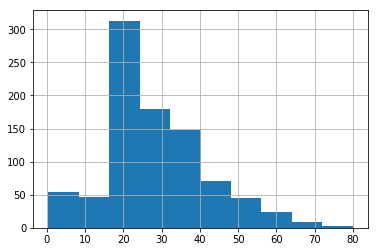

In [309]:
titanic_train['Age'].hist()

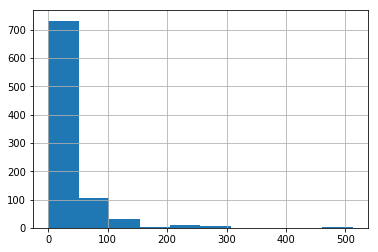

In [310]:
titanic_train['Fare'].hist()

In [311]:
bins_age = [0,10,20,30,50,80]
labels_age = [1,2,3,4,5]
titanic_train['Age_binned'] = pd.cut(titanic_train['Age'], bins=bins_age, labels=labels_age)

In [312]:
bins_fare = [0,25,50,100,300,600]
labels_fare = [1,2,3,4,5]
titanic_train['Fare_binned'] = pd.cut(titanic_train['Fare'], bins=bins_fare, labels=labels_fare)

In [313]:
titanic_train.drop(["Age","Fare"],axis=1,inplace=True)

In [314]:
titanic_test['Age_binned'] = pd.cut(titanic_test['Age'], bins=bins_age, labels=labels_age)
titanic_test['Fare_binned'] = pd.cut(titanic_test['Fare'], bins=bins_fare, labels=labels_fare)
titanic_test.drop(["Age","Fare"],axis=1,inplace=True)

In [315]:
titanic_train["Family_Size"] = titanic_train["SibSp"]+titanic_train["Parch"]
titanic_test["Family_Size"] = titanic_test["SibSp"]+titanic_test["Parch"]

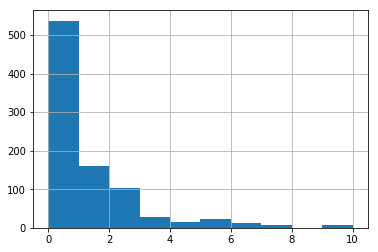

In [316]:
titanic_train["Family_Size"].hist()

In [317]:
bins_family = [-1,1,4,10]
labels_family = ['Single','Medium_Family','Large_Family']
titanic_train['Family_Size_Binned'] = pd.cut(titanic_train['Family_Size'], bins=bins_family, labels=labels_family)
titanic_test['Family_Size_Binned'] = pd.cut(titanic_test['Family_Size'], bins=bins_family, labels=labels_family)

In [318]:
titanic_train.drop(["SibSp","Parch","Family_Size"],axis=1,inplace=True)
titanic_test.drop(["SibSp","Parch","Family_Size"],axis=1,inplace=True)

In [319]:
x_train = titanic_train.drop(['Survived'],axis = 1)
combined = x_train.append(titanic_test)
combined.reset_index(inplace=True)
combined.drop('index', inplace=True, axis=1)


In [320]:
y_train = titanic_train['Survived']

In [321]:
combined_n = pd.get_dummies(combined,columns= ["Pclass","Sex","Embarked","Title",'Age_binned','Fare_binned','Family_Size_Binned'],drop_first=True);

In [322]:
combined_n.shape

(1309, 32)

In [323]:
titanic_train_n= combined_n.iloc[0:891,:]
titanic_test_n = combined_n.iloc[891:1309,:]

In [324]:
titanic_test_n.tail(1)

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_Col,Title_Don,Title_Dona,Title_Dr,Title_Jonkheer,...,Age_binned_2,Age_binned_3,Age_binned_4,Age_binned_5,Fare_binned_2,Fare_binned_3,Fare_binned_4,Fare_binned_5,Family_Size_Binned_Medium_Family,Family_Size_Binned_Large_Family
1308,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


# Dividing the training set into training and validation set

In [332]:
train, validation,y_tr,y_val = cross_validation.train_test_split(titanic_train_n,y_train,test_size = 0,random_state = 0)

# Model Fit

In [326]:
classifier_LR = LogisticRegression(penalty='l2',random_state = 0)
classifier_RF = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier_GB = GaussianNB()
classifier_SVC = SVC(kernel = 'rbf', random_state = 0)
classifier_KNN = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)

In [333]:
accuracies_LR = cross_val_score(estimator = classifier_LR, X=train , y=y_tr , cv = 10)
accuracies_RF = cross_val_score(estimator = classifier_RF, X=train , y=y_tr , cv = 10)
accuracies_GB = cross_val_score(estimator = classifier_GB, X=train , y=y_tr , cv = 10)
accuracies_SVC = cross_val_score(estimator = classifier_SVC, X=train , y=y_tr , cv = 10)
accuracies_KNN = cross_val_score(estimator = classifier_KNN, X=train , y=y_tr , cv = 10)

In [334]:
print("Accuracy - Logistic Regression:", accuracies_LR.mean())
print("Accuracy - Random Forest:", accuracies_RF.mean())
print("Accuracy - Naive Gaussian:", accuracies_GB.mean())
print("Accuracy - Support_Vector:", accuracies_SVC.mean())
print("Accuracy - K-Nearest Neighbor:", accuracies_KNN.mean())

Accuracy - Logistic Regression: 0.819372942912
Accuracy - Random Forest: 0.818148904778
Accuracy - Naive Gaussian: 0.628542163205
Accuracy - Support_Vector: 0.821607365793
Accuracy - K-Nearest Neighbor: 0.81480308705


In [336]:
classifier_KNN.fit(train,y_tr)
classifier_RF.fit(train,y_tr)
classifier_LR.fit(train,y_tr)
classifier_SVC.fit(train,y_tr)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [330]:
y_predict_KNN = classifier_KNN.predict(validation)
y_predict_RF = classifier_RF.predict(validation)
y_predict_LR = classifier_LR.predict(validation)
y_predict_SVC = classifier_LR.predict(validation)

In [331]:
print("Logistic Regression-Prediction on Validation-Set",(y_predict_LR == y_validation).mean())
print("Random Forest-Prediction on Validation-Set",(y_predict_RF == y_validation).mean())
print("K Nearest Neighbour-Prediction on Validation-Set",(y_predict_KNN == y_validation).mean())

Logistic Regression-Prediction on Validation-Set 0.813432835821
Random Forest-Prediction on Validation-Set 0.805970149254
K Nearest Neighbour-Prediction on Validation-Set 0.809701492537


# Tuning Parameters 

In [340]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

In [343]:
svc = SVC()

In [344]:
clf = GridSearchCV(svc, parameters)

# For Prediction on Test Set

In [207]:
x = titanic_train_n
y = y_train

In [211]:
classifier_LR = LogisticRegression(penalty='l2',random_state = 0)

In [212]:
classifier_LR.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [337]:
y_predict_LR = classifier_SVC.predict(titanic_test_n)

In [338]:
pd.DataFrame(y_predict_LR).to_csv("survival_pred.csv")